# Data Exploration and Analysis code
To better understand the trajectory of the particles inside the beam, we can look at the distribution of the beam radius, and the correlation between the beam parameters.

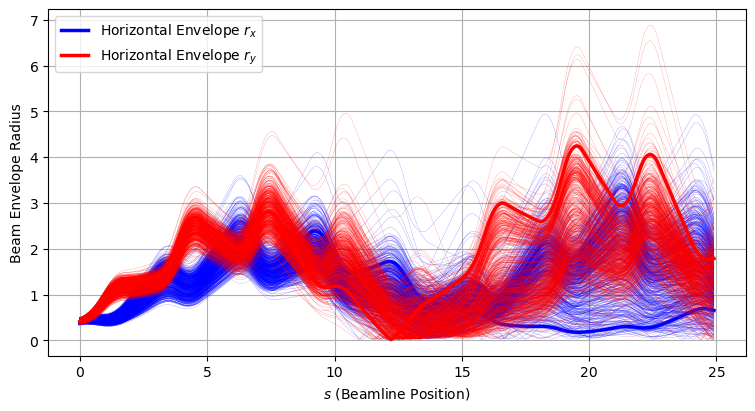

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import os

# Function to read X, Y, and s from each CSV file and store them in a DataFrame
def read_and_combine_data():
    all_data_X = pd.DataFrame()  # Empty DataFrame to store all the data
    all_data_Y = pd.DataFrame()  # Empty DataFrame to store all the data
    all_data_X_prime = pd.DataFrame()  # Empty DataFrame to store all the data
    all_data_Y_prime = pd.DataFrame()  # Empty DataFrame to store all the data

    # Loop through each file in the 'data' directory
    for file in os.listdir('data'):
        if file.endswith('.csv'):
            file_path = os.path.join('data', file)
            df = pd.read_csv(file_path)  # Read the CSV file

            # Select only the columns s, X, and Y
            df_X = df[['X']]
            df_Y = df[['Y']]
            df_X_prime = df[['X_prime']]
            df_Y_prime = df[['Y_prime']]

            # Append to the all_data DataFrame
            all_data_X = pd.concat([all_data_X, df_X], ignore_index=True, axis=1)
            all_data_Y = pd.concat([all_data_Y, df_Y], ignore_index=True, axis=1)
            all_data_X_prime = pd.concat([all_data_X_prime, df_X_prime], ignore_index=True, axis=1)
            all_data_Y_prime = pd.concat([all_data_Y_prime, df_Y_prime], ignore_index=True, axis=1)
    
    all_data_X['s'] = df['s']
    all_data_Y['s'] = df['s']
    all_data_X_prime['s'] = df['s']
    all_data_Y_prime['s'] = df['s']

    return all_data_X, all_data_Y, all_data_X_prime, all_data_Y_prime

# Read the data from all files
data_X, data_Y,data_X_prime,data_Y_prime = read_and_combine_data()

plt.figure(figsize=(9, 4.5))

# Plot X as a function of s
plt.plot(data_X['s'], data_X.drop('s', axis=1), lw=.1,color='blue')
plt.plot(data_X['s'], data_X.drop('s', axis=1).iloc[:,0], lw=2.5,label="Horizontal Envelope $r_x$", color='blue')

# Plot Y as a function of s
plt.plot(data_Y['s'], data_Y.drop('s', axis=1), lw=.1, color='red')
plt.plot(data_Y['s'], data_Y.drop('s', axis=1).iloc[:,0], lw=2.5, label="Horizontal Envelope $r_y$",color='red')

plt.xlabel('$s$ (Beamline Position)')
plt.ylabel('Beam Envelope Radius')
# plt.title('X(s) and Y(s) as a function of s')
plt.legend()
plt.grid(True)
plt.savefig('X_Y_s.png')
plt.show()

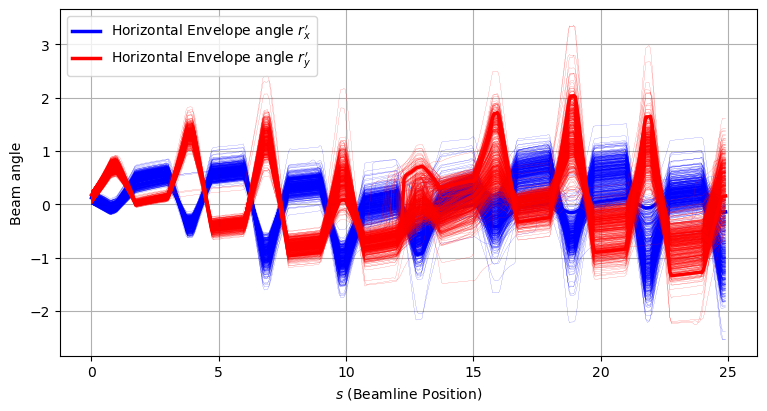

In [2]:
plt.figure(figsize=(9, 4.5))

# Plot X as a function of s
plt.plot(data_X_prime['s'], data_X_prime.drop('s', axis=1), lw=.1,color='blue')
plt.plot(data_X_prime['s'], data_X_prime.drop('s', axis=1).iloc[:,0], lw=2.5,label="Horizontal Envelope angle $r_x'$", color='blue')

# Plot Y as a function of s
plt.plot(data_Y_prime['s'], data_Y_prime.drop('s', axis=1), lw=.1,color='red')
plt.plot(data_Y_prime['s'], data_Y_prime.drop('s', axis=1).iloc[:,0], lw=2.5,label="Horizontal Envelope angle $r_y'$",  color='red')

plt.xlabel('$s$ (Beamline Position)')
plt.ylabel('Beam angle')
# plt.title('X\'(s) and Y\'(s) as a function of s')
plt.legend()
plt.grid(True)
plt.savefig('X_prime_Y_prime_s.png')
plt.show()

In [3]:
data_X.head()

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,s
0,0.367116,0.442092,0.403719,0.498379,0.410627,0.351029,0.373561,0.471105,0.444638,0.490047,...,0.437539,0.466098,0.351866,0.482373,0.401690,0.356551,0.413817,0.474482,0.356656,0.000000
1,0.374176,0.446982,0.412304,0.501150,0.421652,0.358582,0.379149,0.476540,0.452475,0.500936,...,0.440297,0.467339,0.365329,0.483096,0.410113,0.358395,0.424660,0.478492,0.368042,0.059005
2,0.380793,0.451048,0.420205,0.502875,0.431929,0.365719,0.384275,0.481022,0.459590,0.510883,...,0.442328,0.467752,0.378387,0.482943,0.417959,0.359853,0.434872,0.481663,0.378917,0.118009
3,0.386978,0.454278,0.427463,0.503576,0.441451,0.372392,0.388925,0.484542,0.465913,0.519735,...,0.443602,0.467302,0.390972,0.481897,0.425179,0.360921,0.444381,0.483885,0.389304,0.177014
4,0.392622,0.456686,0.434073,0.503240,0.450180,0.378592,0.393086,0.487072,0.471300,0.527401,...,0.444088,0.465997,0.402987,0.479940,0.431746,0.361586,0.453171,0.485231,0.399076,0.236019


In [4]:
data_X.describe

<bound method NDFrame.describe of             0         1         2         3         4         5         6  \
0    0.367116  0.442092  0.403719  0.498379  0.410627  0.351029  0.373561   
1    0.374176  0.446982  0.412304  0.501150  0.421652  0.358582  0.379149   
2    0.380793  0.451048  0.420205  0.502875  0.431929  0.365719  0.384275   
3    0.386978  0.454278  0.427463  0.503576  0.441451  0.372392  0.388925   
4    0.392622  0.456686  0.434073  0.503240  0.450180  0.378592  0.393086   
..        ...       ...       ...       ...       ...       ...       ...   
418  0.687274  1.541422  2.644924  1.678210  1.671083  0.760301  1.579347   
419  0.679814  1.482076  2.561588  1.625542  1.607669  0.746336  1.524489   
420  0.670742  1.418165  2.472125  1.567790  1.540258  0.730898  1.464938   
421  0.661813  1.353730  2.382917  1.508833  1.473003  0.715875  1.404727   
422  0.653171  1.289570  2.293848  1.450508  1.405964  0.701333  1.344832   

            7         8         9  ...   

Statistics for X:
Mean: 1.3017616679148942
Median: 1.2572066894692713
Standard Deviation: 0.6696852900906607
Min: 0.0140252161757957
Max: 4.935041360026103
25th Percentile: 0.7765461936403653
75th Percentile: 1.7395286750693864


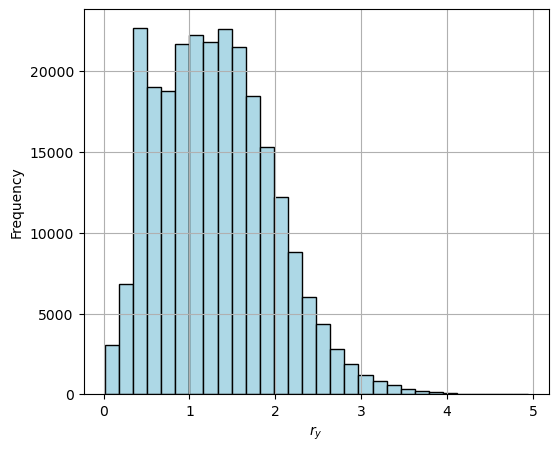

In [5]:
# Function to compute statistics for the X column
def compute_statistics(data):
    X = data.drop('s', axis=1).values.flatten()
    stats = {
        'Mean': np.mean(X),
        'Median': np.median(X),
        'Standard Deviation': np.std(X),
        'Min': np.min(X),
        'Max': np.max(X),
        '25th Percentile': np.percentile(X, 25),
        '75th Percentile': np.percentile(X, 75)
    }
    return stats

# Function to plot statistics and different figures for X
def plot_statistics_and_figures(data):
    X = data.drop('s', axis=1).values.flatten()
    s = data['s']

    # Plot a histogram of X
    plt.figure(figsize=(6, 5))
    plt.hist(X, bins=30, color='lightblue', edgecolor='black')
    plt.xlabel('$r_y$')
    plt.ylabel('Frequency')
    # plt.title('Histogram of X')
    plt.grid(True)
    plt.savefig('histogram_Y.png')
    plt.show()

# Compute and print statistics
statistics = compute_statistics(data_X)
print("Statistics for X:")
for stat_name, value in statistics.items():
    print(f"{stat_name}: {value}")

# Plot different figures for X
plot_statistics_and_figures(data_X)

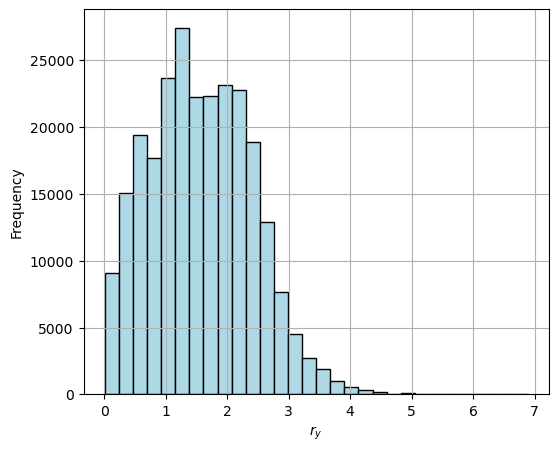

In [6]:
# Plot different figures for X
plot_statistics_and_figures(data_Y)

In [7]:
# Specify the file name
file_name = 'data/sample_1.csv'

# Read the CSV file
try:
    # Load the CSV file into a DataFrame
    df_plot = pd.read_csv(file_name)
    
    # Display the first few rows of the DataFrame
    print("CSV file loaded successfully. Here is a preview:")
    print(df_plot.head())
except FileNotFoundError:
    print(f"The file '{file_name}' was not found. Please check the file name or its location.")
except Exception as e:
    print(f"An error occurred: {e}")

# Make the first column the index of the DataFrame
df_plot.set_index(df_plot.columns[0], inplace=True)

df_plot = df_plot.iloc[:, -4:]

df_plot.columns = ['$r_x$', "$r_x'$", '$r_y$', "$r_y'$"]

CSV file loaded successfully. Here is a preview:
          s  quadrupole_param_1  quadrupole_param_2         X   X_prime  \
0  0.000000            1.031631           -1.039296  0.367116  0.122978   
1  0.059005            0.954450           -1.035729  0.374176  0.115679   
2  0.118009            0.954596           -1.011231  0.380793  0.108867   
3  0.177014            0.983268           -0.960929  0.386978  0.100788   
4  0.236019            1.047516           -1.014200  0.392622  0.090544   

          Y   Y_prime  
0  0.414300  0.177231  
1  0.425929  0.217550  
2  0.439934  0.256813  
3  0.456279  0.297164  
4  0.475074  0.339835  


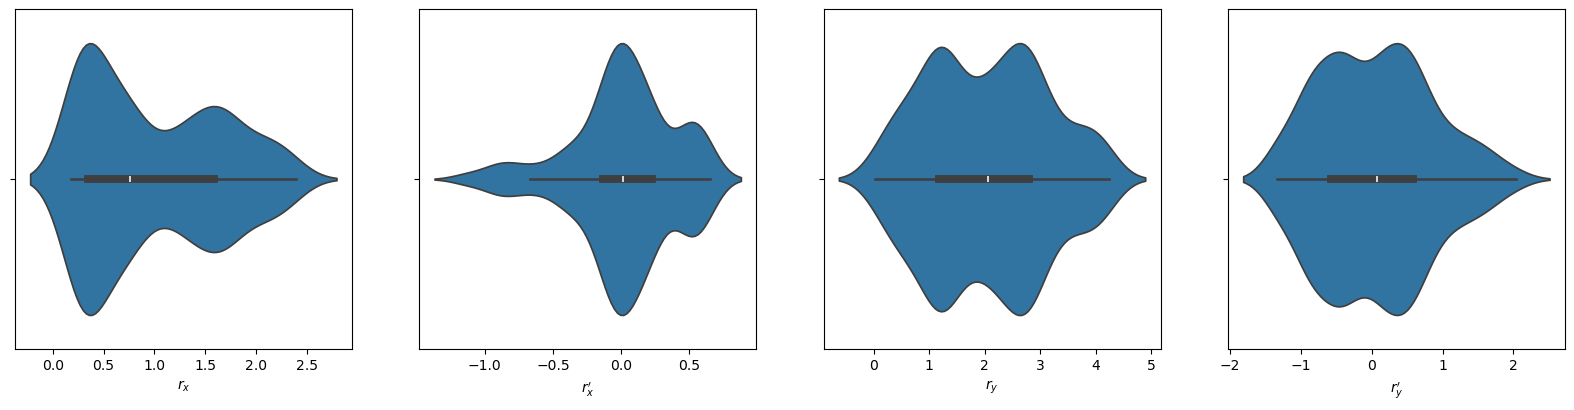

In [8]:
### ANSWER
import seaborn as sns

# Plotting the violin plot of the dataframe on a 3x3 grid.
plt.figure(figsize=(20,15))
for i, col in enumerate(df_plot.columns):
    plt.subplot(3, 4, i+1)
    sns.violinplot(x=df_plot[col])
    # plt.title(col)
plt.show()

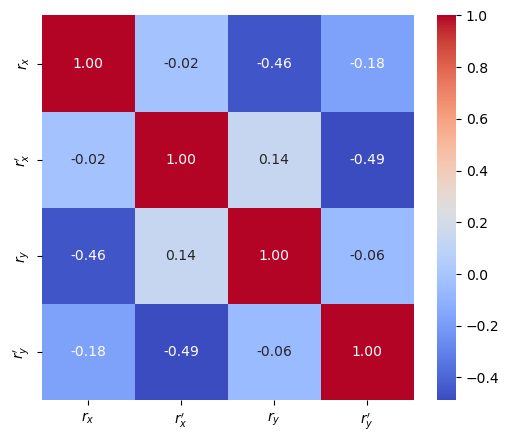

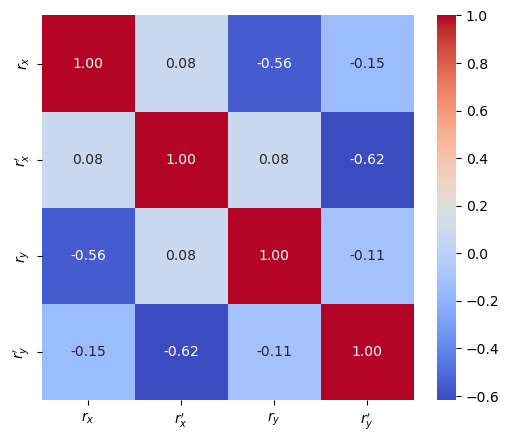

In [9]:
### ANSWER
corr_pearson = df_plot.corr(method='pearson') # Pearson correlation matrix
corr_spearman = df_plot.corr(method='spearman') # Spearman correlation matrix

### ANSWER
plt.figure(figsize=(6,5))
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Pearson Correlation')
plt.show()

plt.figure(figsize=(6,5)) 
sns.heatmap(corr_spearman, annot=True
, cmap='coolwarm', fmt=".2f")   
# plt.title('Spearman Correlation')
plt.show()

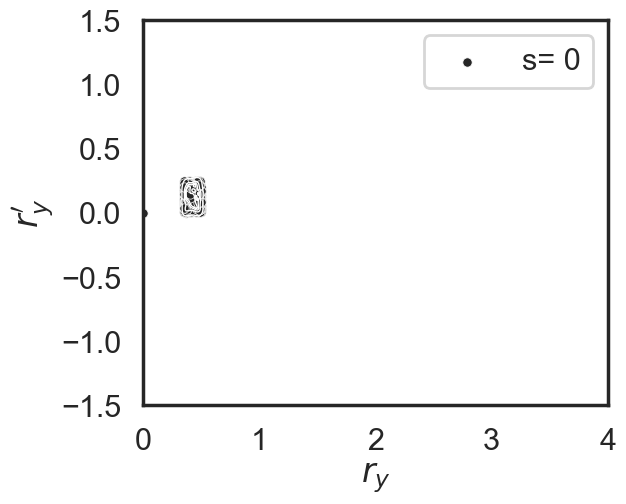

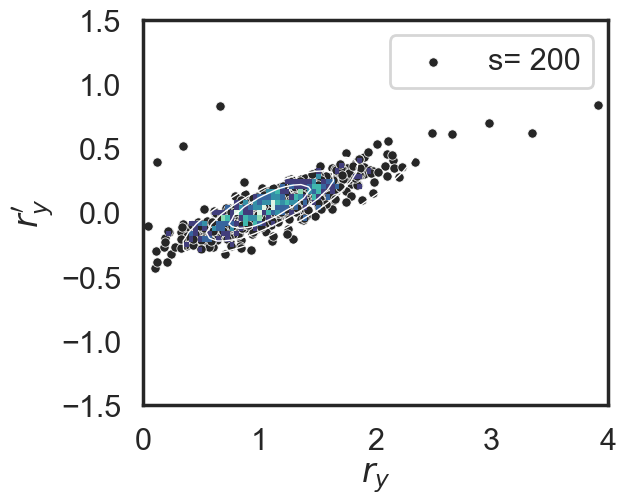

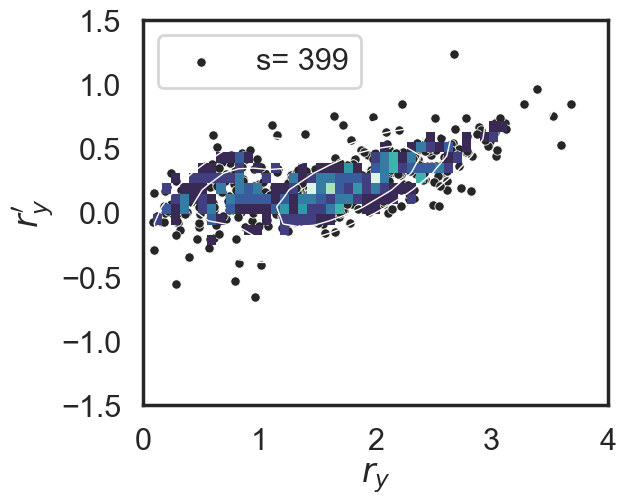

In [11]:
import seaborn as sns

s = data_X.index

def plot_scatter(X, X_prime):
    selected_indices = [0, 200, 399]  # Indices for the 1st, 250th, and 500th columns
    # sns.set(font_scale=1.5)
    sns.set_context("poster")
    sns.set_style("white")
    
    for idx in selected_indices:
        plt.figure(figsize=(6,5))
        # plt.scatter(X.iloc[idx,:], X_prime.iloc[idx,:], color='blue', alpha=0.5)

        
        
        sns.scatterplot(x=X.iloc[idx,:], y=X_prime.iloc[idx,:], s=45, label=f's= {np.round(s[idx],1)}', color=".15")
        sns.histplot(x=X.iloc[idx,:], y=X_prime.iloc[idx,:], bins=300, pthresh=.1, cmap="mako")
        sns.kdeplot(x=X.iloc[idx,:], y=X_prime.iloc[idx,:], levels=5, color="w", linewidths=1)
        # sns.jointplot(x=X.iloc[idx,:], y=X_prime.iloc[idx,:], kind="kde", color="#4CB391")

        plt.xlabel('$r_y$')
        plt.ylabel('$r_y\'$')
        # plt.title(f'Scatter Plot of X_{idx+1} vs X_prime_{idx+1}')
        # plt.grid(True)
        plt.ylim(-1.5,1.5)
        plt.xlim(0,4)
        plt.savefig(f'scatter_Y_{idx+1}_Y_prime_{idx+1}.png')
        plt.show()

# Assuming X and X_prime are dataframes already loaded
# Call the function with your X and X_prime dataframes
plot_scatter(data_X, data_X_prime)

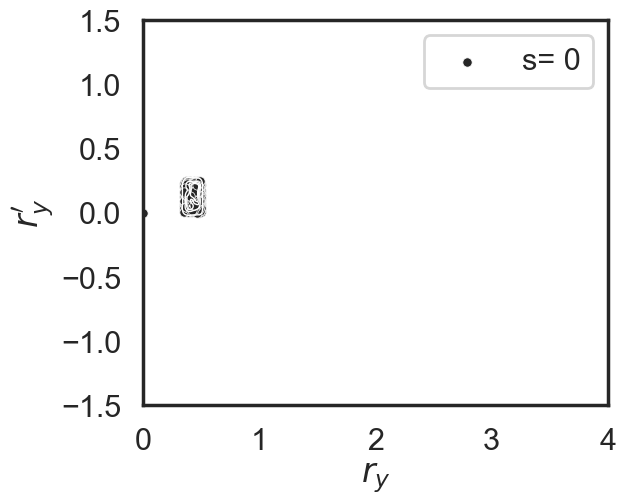

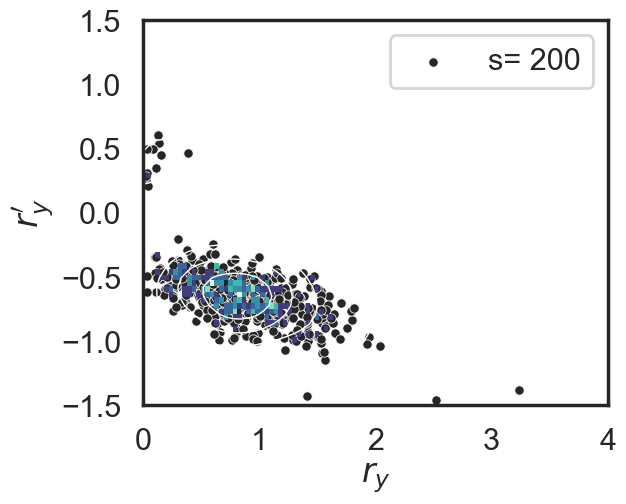

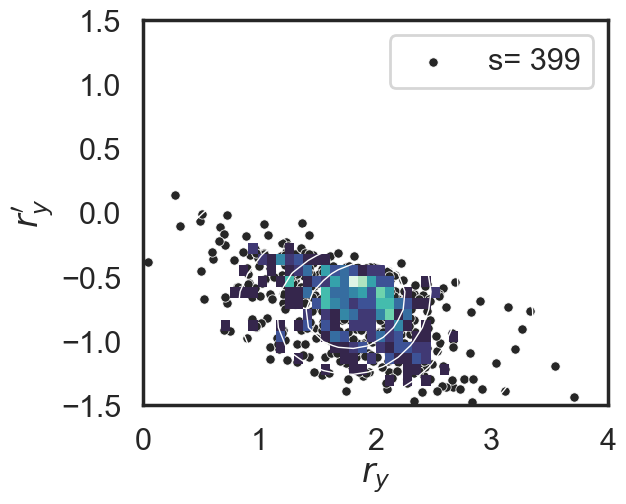

In [12]:
plot_scatter(data_Y, data_Y_prime)